In [1]:
from awg import *
from awg.core import *
import matplotlib.pyplot as plt

## The purpose of this tutorial is to demonstrate the intermediate transfer functions composing the AWG.


### Create AWG definition for a 100GHz demultiplexer on SOI


In [2]:
model = AWG(clad = SiO2, core = Si, subs = SiO2, lambda_c = 1.550,
            Ni = 1, No = 9, w = 0.450, h = 0.220, N = 40, m = 75, R = 130,
            d = 2.5, g = 0.4, do = 1.8, wi = 1.5, wo = 1.5, L0 = 20)

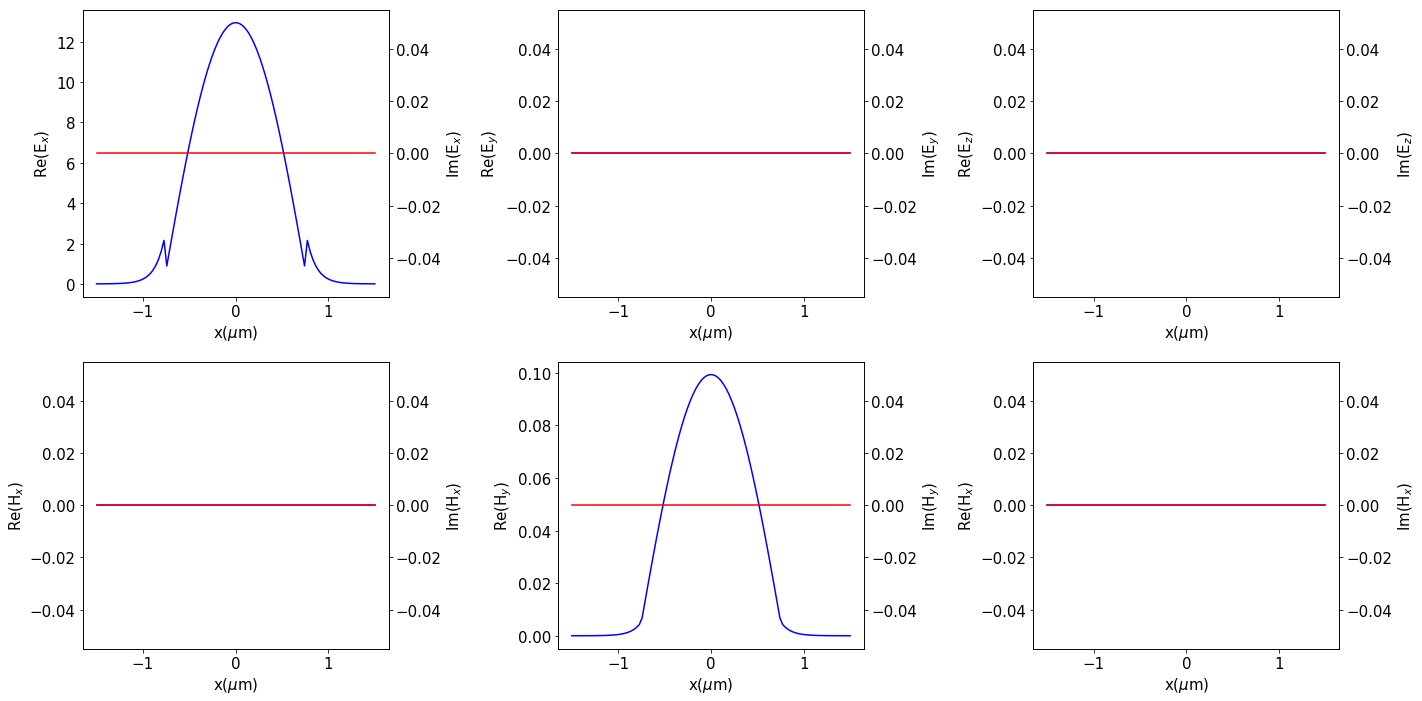

In [3]:
F1 = iw(model,model.lambda_c+0.0031,0, ModeType ="solve",Points = 100)
plt.rcParams["figure.figsize"]=20,10
plt.rcParams.update({'font.size': 15})
plotfield(F1)

In [4]:
lmbda = model.lambda_c + 0.0031
modetype = "solve"

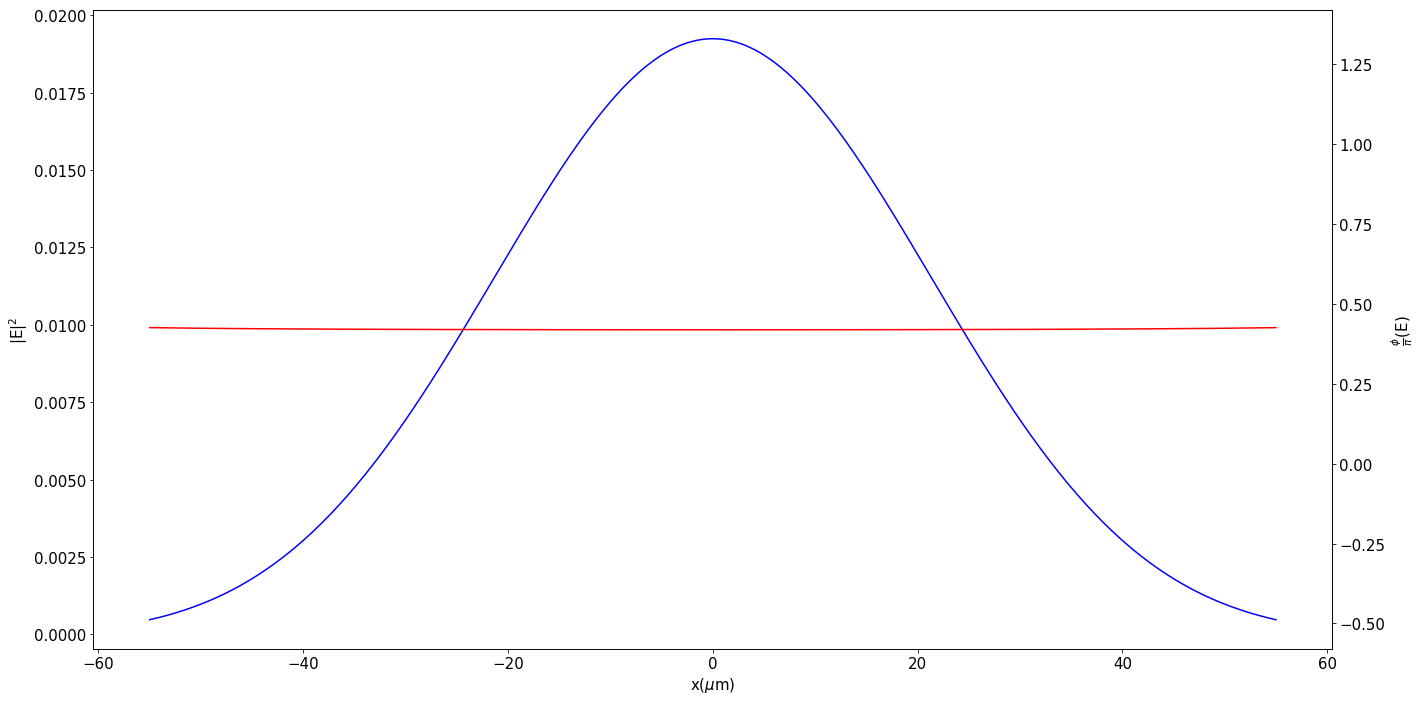

In [5]:
F2 = fpr1(model,lmbda,F1,Points = 500)
plotfield(F2,PlotPhase = True,UnwrapPhase = True, NormalizePhase = True)
plt.rcParams.update({'font.size': 15})
plt.show()

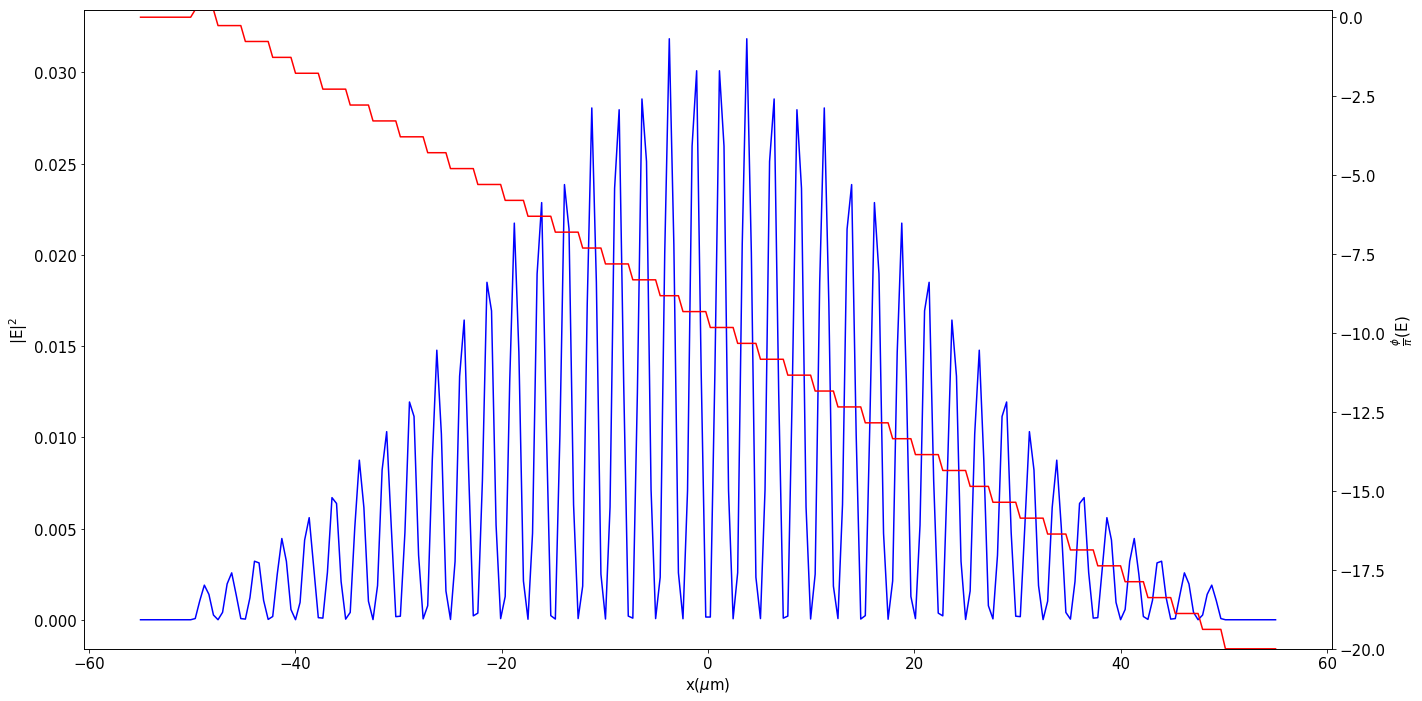

In [6]:
F3 = aw(model,lmbda,F2,ModeType = modetype)
plotfield(F3,PlotPhase = True,UnwrapPhase = True, NormalizePhase = True)
plt.show()

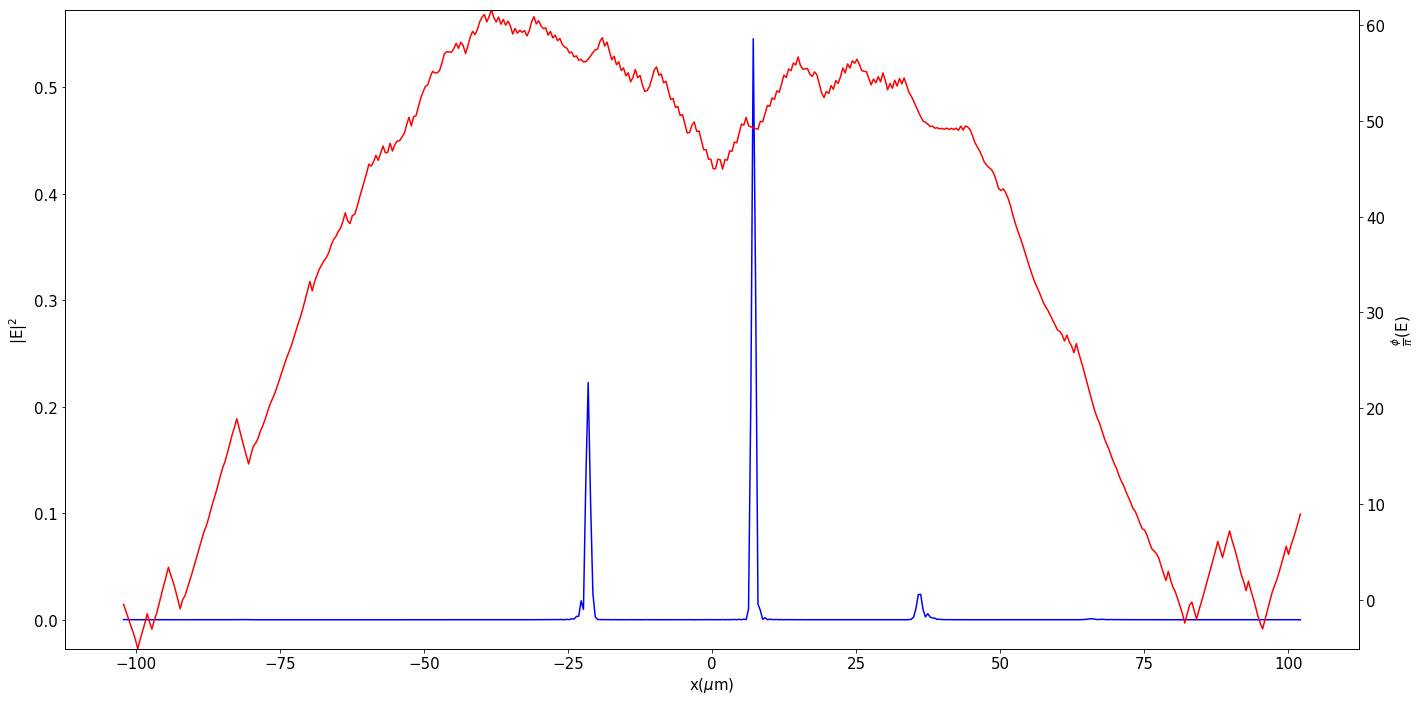

In [7]:
F4 = fpr2(model,lmbda,F3, points = 500)

plotfield(F4,PlotPhase = True,UnwrapPhase = True, NormalizePhase = True)
plt.show()

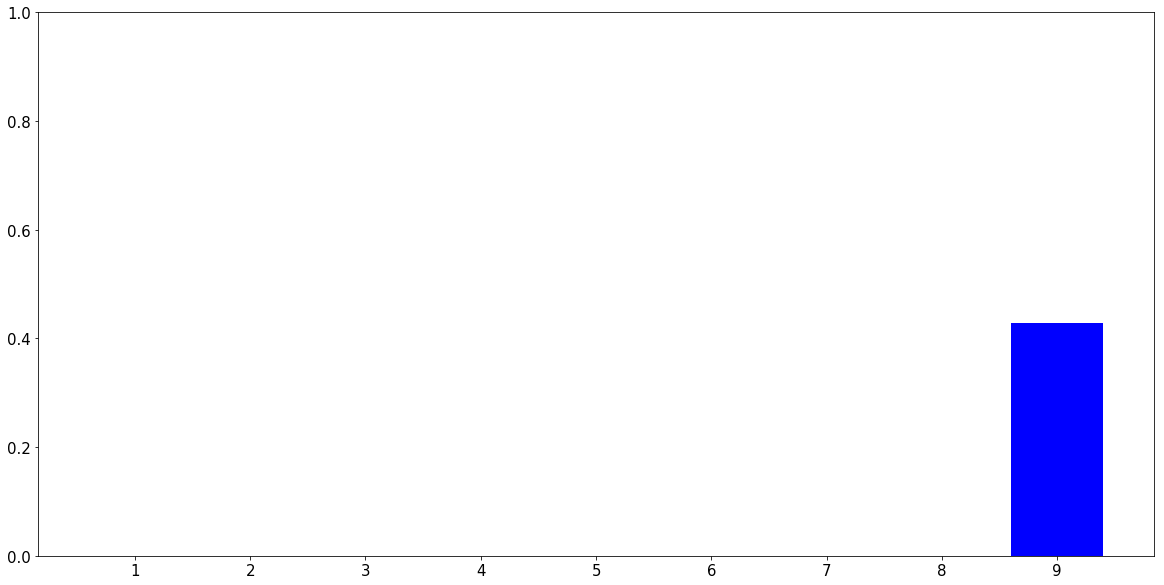

In [10]:
T = ow(model,lmbda,F4,ModeType = modetype)
plt.bar([i+1 for i in range(len(T))],T, color = "b")
plt.xticks([i+1 for i in range(len(T))])
plt.ylim(0,1)
plt.show()